In [1]:
import numpy as np
import gwcosmo
import pickle
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [2]:
event_list = ['GW150914', 'GW151226', 'GW170104', 'GW170608', 'GW170809', 'GW170814', 'GW170818', 'GW170823', 'GW190408_181802', 'GW190412', 'GW190503_185404', 'GW190512_180714', 'GW190513_205428', 'GW190517_055101', 'GW190519_153544' ,'GW190521_074359', 'GW190602_175927', 'GW190630_185205', 'GW190701_203306', 'GW190706_222641', 'GW190707_093326', 'GW190708_232457', 'GW190720_000836', 'GW190727_060333', 'GW190728_064510', 'GW190828_063405', 'GW190828_065509', 'GW190910_112807', 'GW190915_235702', 'GW190924_021846', 'GW191109_010717', 'GW191129_134029', 'GW191204_171526', 'GW191216_213338', 'GW191222_033537', 'GW200112_155838', 'GW200129_065458', 'GW200202_154313', 'GW200224_222234', 'GW200225_060421', 'GW200311_115853']#,'GW190521']


# population method

In [4]:
likelihood_broken = [0]*len(event_list)
likelihood_broken_norm = [0]*len(event_list)

In [5]:
for i in range(len(event_list)):
    likelihood_broken[i] = np.load(f'../posterior/{event_list[i]}_H0_broken_powerlaw_likelihood_breakdown.npz', allow_pickle=True)


In [6]:
H0_val = likelihood_broken[0]['arr_0'][0]

In [7]:
likelihood_broken_combine = 1

for i in range(len(event_list)):
    likelihood_broken_norm[i] = likelihood_broken[i]['arr_0'][1] / simps(likelihood_broken[i]['arr_0'][1], x=H0_val)
    likelihood_broken_combine *= likelihood_broken_norm[i]
    
likelihood_broken_combine_norm = likelihood_broken_combine / simps(likelihood_broken_combine, x=H0_val)


In [8]:
prior_log = gwcosmo.prior.priors.p_param(H0_val,prior='log')
prior_log_norm = prior_log / simps(prior_log, x=H0_val)

posterior_log_broken_combine = prior_log*likelihood_broken_combine

posterior_log_broken_combine_norm = posterior_log_broken_combine / simps(posterior_log_broken_combine, x=H0_val)


In [9]:
con_int_broken_flat = gwcosmo.utilities.posterior_utilities.confidence_interval(likelihood_broken_combine_norm, H0_val)

low_broken_flat = con_int_broken_flat.lower_level
up_broken_flat = con_int_broken_flat.upper_level
map_broken_flat = con_int_broken_flat.map

con_int_broken_log = gwcosmo.utilities.posterior_utilities.confidence_interval(posterior_log_broken_combine_norm, H0_val)

low_broken_log = con_int_broken_log.lower_level
up_broken_log = con_int_broken_log.upper_level
map_broken_log = con_int_broken_log.map

print('broken powerlaw flat prior')
print('H0 = %.2f + %.2f - %.2f'%(map_broken_flat, up_broken_flat, low_broken_flat))
print('broken powerlaw log prior')
print('H0 = %.2f + %.2f - %.2f'%(map_broken_log, up_broken_log, low_broken_log))

broken powerlaw flat prior
H0 = 21.72 + 40.05 - 20.18
broken powerlaw log prior
H0 = 20.00 + 34.92 - 20.18


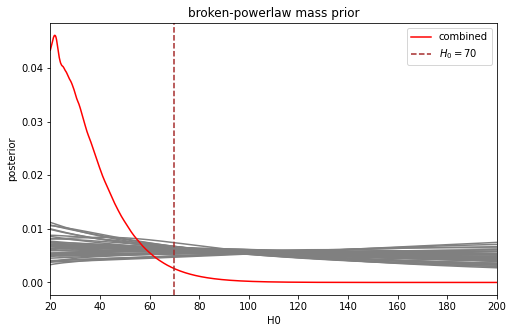

In [10]:
plt.figure(figsize=(8,5))
for i in range(len(event_list)):
    plt.plot(H0_val, likelihood_broken_norm[i], color='grey') #, label=event_list[i])
plt.plot(H0_val, likelihood_broken_combine_norm, color='r', label='combined')
plt.axvline(70, color='brown', linestyle='--', label=r'$H_0=70$')
plt.xlabel('H0')
plt.ylabel('posterior')
plt.title('broken-powerlaw mass prior')
plt.xlim(20,200)
# plt.ylim(0, 1.8)
plt.legend()
# plt.savefig('../plots/posterior_Xi0_flat.pdf')

In [12]:
likelihood_gaussian = [0]*len(event_list)
likelihood_gaussian_norm = [0]*len(event_list)

In [13]:
for i in range(len(event_list)):
    likelihood_gaussian[i] = np.load(f'../posterior/{event_list[i]}_H0_powerlaw_gaussian_likelihood_breakdown.npz', allow_pickle=True)


In [14]:
H0_val = likelihood_gaussian[0]['arr_0'][0]

In [15]:
likelihood_gaussian_combine = 1

for i in range(len(event_list)):
    likelihood_gaussian_norm[i] = likelihood_gaussian[i]['arr_0'][1] / simps(likelihood_gaussian[i]['arr_0'][1], x=H0_val)
    likelihood_gaussian_combine *= likelihood_gaussian_norm[i]
    
likelihood_gaussian_combine_norm = likelihood_gaussian_combine / simps(likelihood_gaussian_combine, x=H0_val)


In [16]:
prior_log = gwcosmo.prior.priors.p_param(H0_val,prior='log')
prior_log_norm = prior_log / simps(prior_log, x=H0_val)

posterior_log_gaussian_combine = prior_log*likelihood_gaussian_combine

posterior_log_gaussian_combine_norm = posterior_log_gaussian_combine / simps(posterior_log_gaussian_combine, x=H0_val)


In [18]:
con_int_gaussian_flat = gwcosmo.utilities.posterior_utilities.confidence_interval(likelihood_gaussian_combine_norm, H0_val)

low_gaussian_flat = con_int_gaussian_flat.lower_level
up_gaussian_flat = con_int_gaussian_flat.upper_level
map_gaussian_flat = con_int_gaussian_flat.map

con_int_gaussian_log = gwcosmo.utilities.posterior_utilities.confidence_interval(posterior_log_gaussian_combine_norm, H0_val)

low_gaussian_log = con_int_gaussian_log.lower_level
up_gaussian_log = con_int_gaussian_log.upper_level
map_gaussian_log = con_int_gaussian_log.map

print('powerlaw gaussian flat prior')
print('H0 = %.2f + %.2f - %.2f'%(map_gaussian_flat, up_gaussian_flat, low_gaussian_flat))
print('powerlaw gaussian log prior')
print('H0 = %.2f + %.2f - %.2f'%(map_gaussian_log, up_gaussian_log, low_gaussian_log))

powerlaw gaussian flat prior
H0 = 32.60 + 47.41 - 20.18
powerlaw gaussian log prior
H0 = 21.99 + 41.37 - 20.18


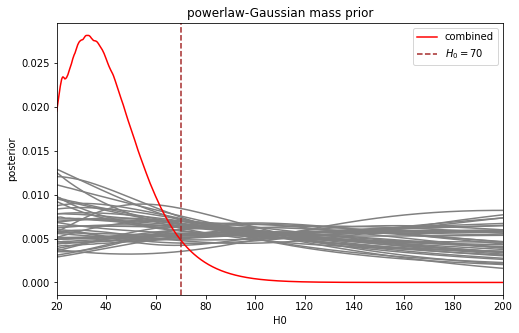

In [17]:
plt.figure(figsize=(8,5))
for i in range(len(event_list)):
    plt.plot(H0_val, likelihood_gaussian_norm[i], color='grey')
plt.plot(H0_val, likelihood_gaussian_combine_norm, color='r', label='combined')
plt.axvline(70, color='brown', linestyle='--', label=r'$H_0=70$')
plt.xlabel('H0')
plt.ylabel('posterior')
plt.title('powerlaw-Gaussian mass prior')
plt.xlim(20,200)
# plt.ylim(0, 1.8)
plt.legend()

# statistical method

In [35]:
likelihood_broken_stat = [0]*len(event_list)
likelihood_broken_stat_norm = [0]*len(event_list)

In [44]:
for i in range(4):# range(len(event_list)):
    likelihood_broken_stat[i] = np.load(f'../posterior/{event_list[i]}_H0_broken_powerlaw_stat_likelihood_breakdown.npz', allow_pickle=True)


In [45]:
H0_val = likelihood_broken_stat[0]['arr_0'][0]

In [47]:
likelihood_broken_stat_combine = 1

for i in range(4):#(len(event_list)):
    likelihood_broken_stat_norm[i] = likelihood_broken_stat[i]['arr_0'][1] / simps(likelihood_broken_stat[i]['arr_0'][1], x=H0_val)
    likelihood_broken_stat_combine *= likelihood_broken_stat_norm[i]
    
likelihood_broken_stat_combine_norm = likelihood_broken_stat_combine / simps(likelihood_broken_stat_combine, x=H0_val)


In [49]:
likelihood_broken_stat_combine_norm

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [48]:
con_int_broken_stat_flat = gwcosmo.utilities.posterior_utilities.confidence_interval(likelihood_broken_stat_combine_norm, H0_val)

low_broken_stat_flat = con_int_broken_stat_flat.lower_level
up_broken_stat_flat = con_int_broken_stat_flat.upper_level
map_broken_stat_flat = con_int_broken_stat_flat.map

print('broken powerlaw flat prior')
print('H0 = %.2f + %.2f - %.2f'%(map_broken_stat_flat, up_broken_stat_flat, low_broken_stat_flat))

ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [37]:
likelihood_broken_stat_test = np.load('/Users/ansonchan/gwcosmo/gwcosmo/test/GW150914_H0_broken_powerlaw_stat_test_likelihood_breakdown.npz', allow_pickle=True)


In [38]:
H0_test = likelihood_broken_stat_test['arr_0'][0]

In [51]:
print(likelihood_broken_stat_test['arr_0'][4])

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]


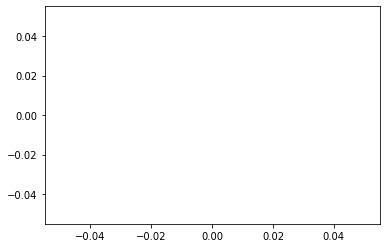

In [40]:
plt.plot(H0_test, likelihood_broken_stat_test['arr_0'][1], color='grey')